In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [24]:
#Load Dataset
(xtrain,ytrain) , (xtest,ytest) = keras.datasets.mnist.load_data()

In [25]:
xtrain.shape

(60000, 28, 28)

In [26]:
xtest.shape

(10000, 28, 28)

In [27]:
xtrain[1].shape

(28, 28)

In [28]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

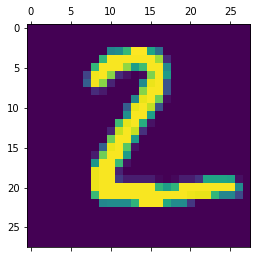

In [29]:
plt.matshow(xtest[1])

In [30]:
#Feature Sclaing
#Normalize 

xtrain = (xtrain / 255)

In [9]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
xtest = xtest / 255

In [11]:
xtest[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
#flatten the images into 28*28 = 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [33]:
xtrain[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
xtrain.shape

(60000, 784)

In [36]:
model = keras.Sequential()
model.add( Dense(50, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add( Dense(10, activation='sigmoid'))


In [38]:
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

In [39]:
model.fit(xtrain, 
          to_categorical(ytrain),
          epochs=20,
          batch_size=32,
          )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5089 - accuracy: 0.8530
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1394 - accuracy: 0.9583
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0953 - accuracy: 0.9700
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0765 - accuracy: 0.9766
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9812
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9842
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.9855
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0403 - accuracy: 0.9867
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.9887
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.029

In [40]:
#Evaluate 
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9747


[0.13375945389270782, 0.9746999740600586]

In [41]:
pred = model.predict(xtest)

In [20]:
pred

array([[3.9339984e-10, 8.5541606e-03, 5.1865732e-06, ..., 1.0000000e+00,
        1.5874062e-05, 6.1500508e-01],
       [1.4137626e-03, 1.2166929e-01, 1.0000000e+00, ..., 1.9088387e-04,
        8.7224122e-05, 2.9389882e-20],
       [1.9275696e-05, 9.9994540e-01, 1.4975667e-04, ..., 1.2168974e-02,
        5.0122291e-02, 1.7070770e-04],
       ...,
       [1.4656273e-13, 2.8812739e-09, 1.2406477e-11, ..., 5.2179557e-01,
        7.3544311e-06, 7.8574687e-01],
       [1.4081257e-13, 9.5945840e-10, 3.1772938e-13, ..., 5.0488114e-03,
        9.9006283e-01, 5.9302771e-12],
       [1.7592177e-07, 5.2174074e-11, 2.8518861e-09, ..., 2.2752521e-10,
        9.4091892e-04, 1.9857456e-05]], dtype=float32)

In [43]:
np.argmax(pred[4])

4

Text(69.0, 0.5, 'Truth Values')

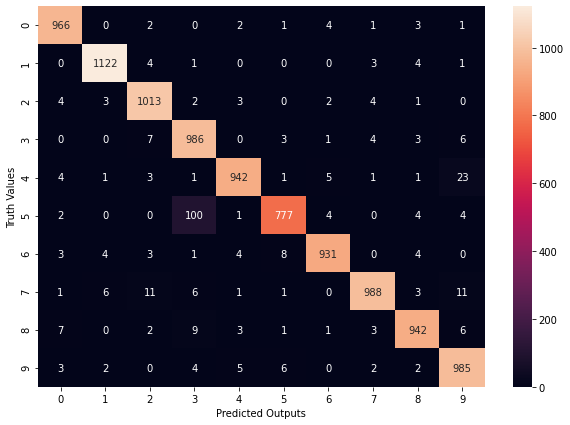

In [45]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')